In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spotifyData = pd.read_csv("source/SpotifyTopSongsByCountryMay2020.csv")

In [5]:
spotifyData

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07
...,...,...,...,...,...,...,...,...
3145,Vietnam,Asia,46,ĐÃ TỪNG LÀ,Vũ.,ĐÃ TỪNG LÀ,0,4:20
3146,Vietnam,Asia,47,Mượn Rượu Tỏ Tình,"BigDaddy, Emily",Mượn Rượu Tỏ Tình,0,3:18
3147,Vietnam,Asia,48,Ngày Tận Thế,"Tóc Tiên, Da LAB, Touliver",Ngày Tận Thế,0,3:52
3148,Vietnam,Asia,49,Đi Đu Đưa Đi,Bich Phuong,Đi Đu Đưa Đi,0,3:40


In [6]:
spotifyData.shape

(3150, 8)

In [8]:
spotifyData.columns

Index(['Country', 'Continent', 'Rank', 'Title', 'Artists', 'Album', 'Explicit',
       'Duration'],
      dtype='object')

In [14]:
unique_countries = spotifyData["Country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'], dtype=object)

In [21]:
segundos = []
for i in spotifyData["Duration"]:
    val = i.split(":")
    secs = int(val[0])*60 + int(val[1])
    segundos.append(secs)

C:\Users\david\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

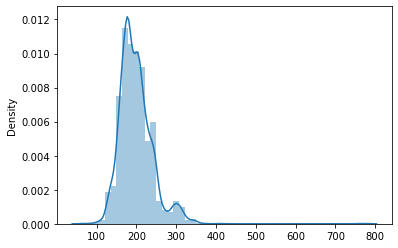

In [22]:
sns.distplot(segundos)

<AxesSubplot:>

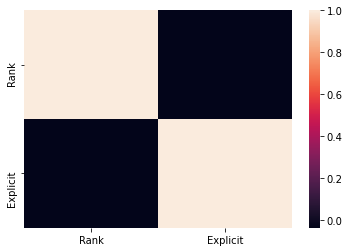

In [15]:
sns.heatmap(spotifyData.corr())

<AxesSubplot:>

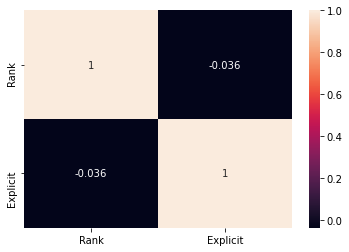

In [16]:

sns.heatmap(spotifyData.corr(), annot=True)

In [20]:
explicitas = spotifyData["Explicit"].value_counts().sort_values()
explicitas

1    1099
0    2051
Name: Explicit, dtype: int64

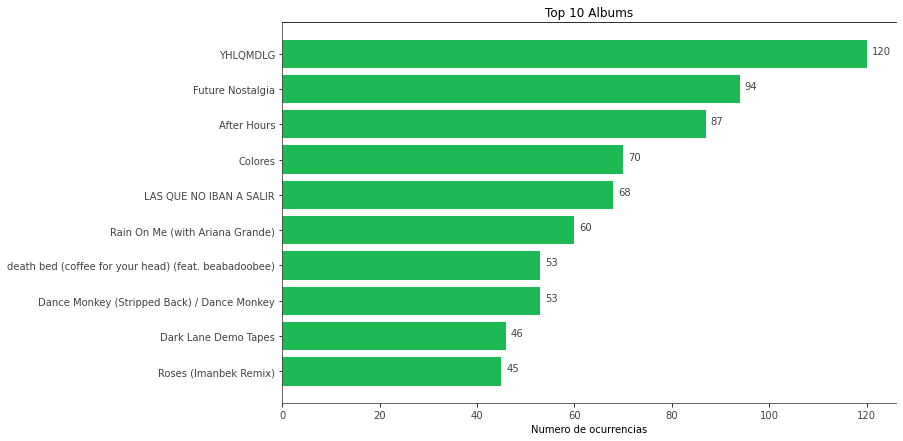

In [23]:
top10_albums = spotifyData["Album"].value_counts()[:10].sort_values(ascending=True)
height = top10_albums.values
bars = top10_albums.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Numero de ocurrencias")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Albums")

plt.show()